## Task #2 of TSF-GRIP 
## To explore Supervised machine learing 
used supervised learning algorithm - linear regression for prediction 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
#first 5 rows of data

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print(f"the data has shape {data.shape}")#rows,columns
data.describe()

the data has shape (25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#checking for null values 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#detail information about the data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
None


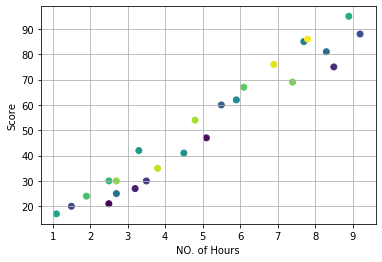

In [153]:
#no empty values so moving for visualizations
#scatter plot -representing a linear relationship of scores with time
x=data['Hours']
y=data['Scores']
colors=range(data["Scores"].count())
#scatter plot shows liner relation of hours with scores
plt.scatter(x,y,c=colors)
plt.xlabel("NO. of Hours")
plt.ylabel("Score")

plt.grid()

plt.show()


In [8]:
#line plot - not reveling much insights for this data
#data.plot(kind='line',title='line graph representation',figsize=(14,5))
#plt.xlabel("labels")
#plt.ylabel("max.value variation with time")


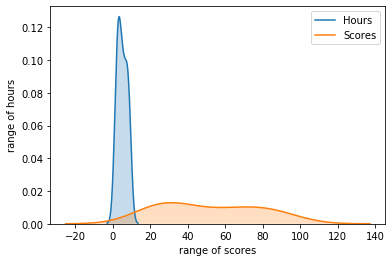

In [29]:
#variation of values of hours and scores
sns.kdeplot(x, shade=True)
sns.kdeplot(y, shade=True);
plt.xlabel("range of scores")
plt.ylabel("range of hours")
plt.show()


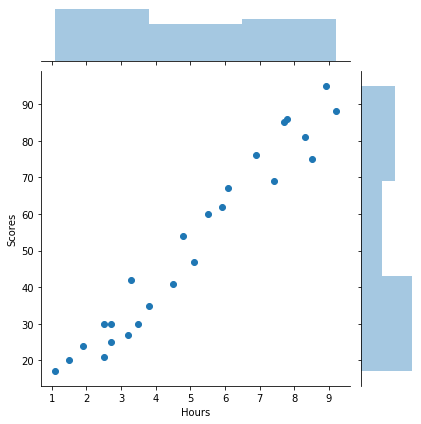

In [159]:
#scatterplot same as above but using seaborn
sns.jointplot(x='Hours',y='Scores',data=data)
plt.show()

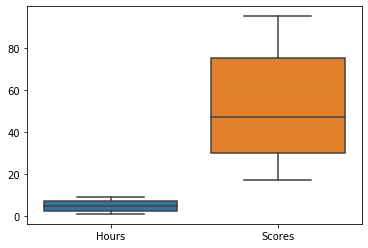

In [11]:
#boxplot - representing upperbound and lowerbound of scores and hours with thier respective means
sns.boxplot(data=data)
plt.show()

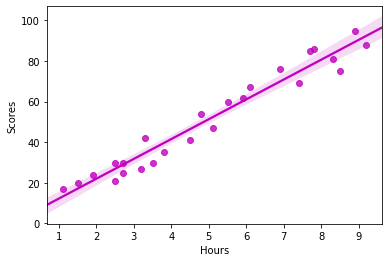

In [114]:
#visualizing linear relation of scores with hours 
sns.regplot(x=x, y=y, color='m', data=data)
plt.show()

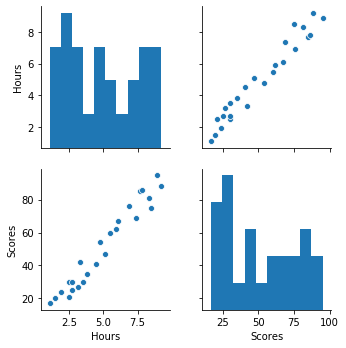

In [13]:
#variation of hours and scores in dataset
sns.pairplot(data)
plt.show()

* checking the frequency of students scoring equal marks 

In [14]:
#no of students scoring same marks

data.groupby('Scores').size()

Scores
17    1
20    1
21    1
24    1
25    1
27    1
30    3
35    1
41    1
42    1
47    1
54    1
60    1
62    1
67    1
69    1
75    1
76    1
81    1
85    1
86    1
88    1
95    1
dtype: int64

#### visualizing above

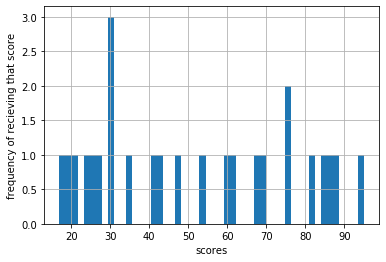

In [15]:
#visvualizing above data
data['Scores'].hist(bins=50)
plt.xlabel("scores")
plt.ylabel("frequency of recieving that score")
plt.show()


In [120]:
#model training
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
#co- relation matrix
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Hours,Scores
Hours,1,0.98
Scores,0.98,1


#### segregating the independent variables from dependent variables

In [162]:
#setting variables , segregating the independent variables from dependent variables
X=data.iloc[:,:-1]
Y=data.iloc[:,1:]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# building model
  simple linear regression

In [163]:
#ValueError: Expected 2D array, got 1D array instead: add -x_train = x_train.reshape(-1, 1),x_test = x_test.reshape(-1, 1)
#added iloc[] slicing of data

model=LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [164]:
print(y_pred)

[[83.10733229]
 [26.76559757]
 [26.76559757]
 [69.50760322]
 [59.79351103]
 [28.70841601]
 [34.53687133]]


### accuracy score

In [165]:
s=r2_score(y_test,y_pred)
print(f" Accuracy score of linear regression model is {s*100:.03f} %")

 Accuracy score of linear regression model is 95.535 %


### Defining functions for prediction on any data value 

In [101]:
#function for getting hours
def get_hours():
    h=float(input("Enter number of hours "))
    
    if(h>24):
        print("invalid input ! \n please provide hour in range 0 - 24 ")
        
    else:
        h=np.reshape(h,(1,1))
        h=h.astype(np.float64)
        
    return h


#function for predicting scores
def predict_score(hours):
    
    p=model.predict(hours)
    print("the predicted score is :",end='  ')
    print(f"{float(p):.2f} %")
    

In [52]:
#reshaping input to desired shape
#arr=[2,4,6,7]
#Inp=np.reshape(arr,(1,4))
#[[2 4 6 7]]


### Predicting output 
predicting scores for number of hours studied with linear regression model

In [102]:
h=get_hours()


Enter number of hours 9.25


In [103]:
predict_score(h)

the predicted score is :  92.34 %
